## 章節 4：更多的估計

### 4.1 歐元問題

David MacKay 的書籍 Information Theory, Inference, and Learning Algorithms 中寫到下述問題：

> 一個統計的論述出現在2002年1月4日星期五的英國《衛報》中：
旋轉一枚比利時的一歐元硬幣250次，出現140正面，110次背面。
一位倫敦經濟學院統計學講師 Barry Bligt 說到：「這令他非常懷疑。」
如果此硬幣是公平的，出現此結果的機率小於7%。
但這些證據是否指出此硬幣是不公平的嗎？

回答此問題，我們將分成兩個步驟。

1. 估計硬幣出現正面的機率。
2. 評估證據是否支持硬幣為不公正的

你可以在此下載到作者的程式碼：http://thinkbayes.com/euro.py
更多細節請參考0.3章節

給定任何一個硬幣，令旋轉硬幣後出現正面的機率 x 。我們似乎可以相信機率 x 跟硬幣的物理特性有關，主要是重量的分佈。如果一個硬幣是完美平衡的，我們期望 x 接近 50%。但對一個不平衡的硬幣，x 可能會很大的不同。我們用貝葉斯定理還有觀察到的資料來**估計 x**。

我們定義101個假設，數值從0到100，Hx 就代表假設出現正面為 x% 的機率。
我用均勻分佈來表示每個 Hx 出現的機率都依樣。隨後我們再回來考慮其他的先驗分佈。
似然性函數相對簡單：如果 Hx 已經決定，那出現正面的機率就是 x/100，反面的機率為 1 - x/100

請參考下方程式碼：

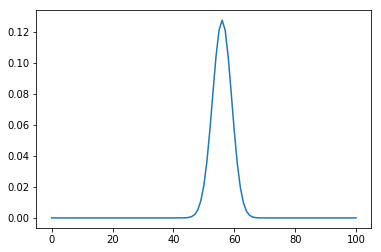

看到證據後，最大的正面機率為： 56 %, 等於 140/250= 0.56


In [16]:
from thinkbayes import Suite
import matplotlib.pyplot as plt

class Euro(Suite):
    
    def Likelihood(self, data, hypo):
        if data == 'H':
            return hypo/100.0
        
        return 1-hypo/100.0

    
head, tail = 140, 110 # 依據問題出現 140 次正面、110次反面
suite = Euro(range(0, 101))
dataset = 'H' * head + 'T' * tail # 觀察到的資料，不考慮順序

for data in dataset:
    suite.Update(data)

x, y = zip(*sorted(suite.Items()))
plt.plot(x, y)
plt.show()
print("看到證據後，最大的正面機率為：", suite.MaximumLikelihood(), "%, 等於 140/250=", head/(head+tail))

上方圖表可發現最大的似然性（Maximum Likelihood）出現在正面機率為 0.56 的時候。

其實這就是找出二項次分佈(Binomial Distribution)的參數 p ，下方是假設我們已經得到參數 p=0.56 時，所有擲出正面次數為 0 到 

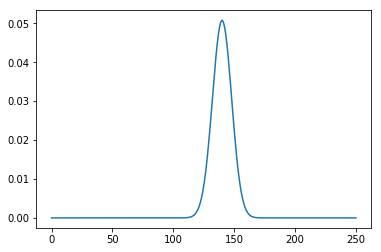

在得知 p=0.56 的情況下，擲出正面次數為 140 的機率最大，即符合所看到的證據。
機率和= 0.9999999999999998 約等於 1


In [33]:
import math
import numpy as np 

def binomial(p, head, n):
    combination = math.factorial(n)/(math.factorial(head)*math.factorial(n-head))
    return combination*(p**head)*((1-p)**(n-head))

p = 0.56
x, y = zip(*[(i, binomial(p, i, 250)) for i in range(251)])
plt.plot(x, y)
plt.show()
print("在得知 p=0.56 的情況下，擲出正面次數為", np.argmax(y), "的機率最大，即符合所看到的證據。")
print("機率和=", sum(y), "約等於 1")